# House Pricing Prediction. Assignment 3

##### Prajwal Kulkarni(20BCE0110)

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading data
df=pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [19]:
#Check for Missing values and deal with them.
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [7]:
#Perform descriptive statistics on the dataset.
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

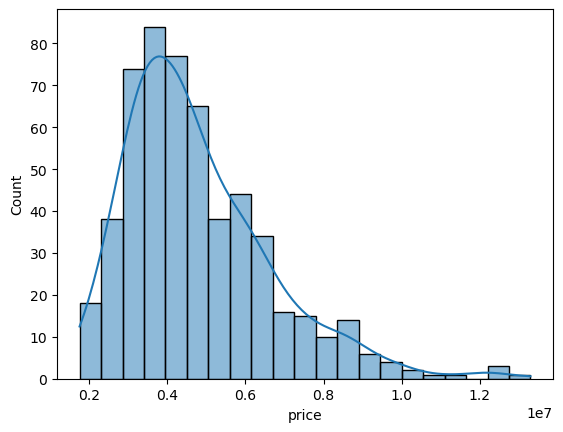

In [8]:
#histogram for price
sns.histplot(df.price,kde=True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airconditioning', ylabel='count'>

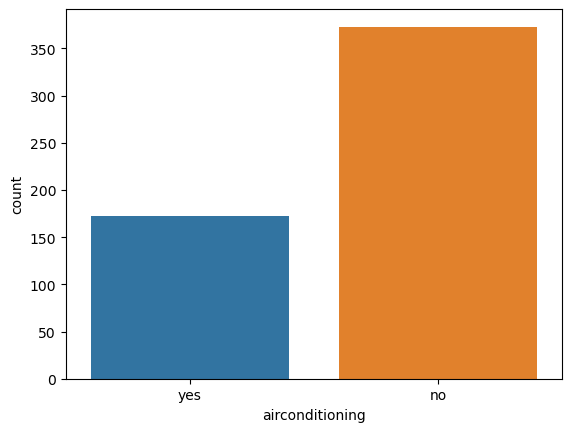

In [9]:
#countplot for various attributes
sns.countplot(df.airconditioning)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hotwaterheating', ylabel='count'>

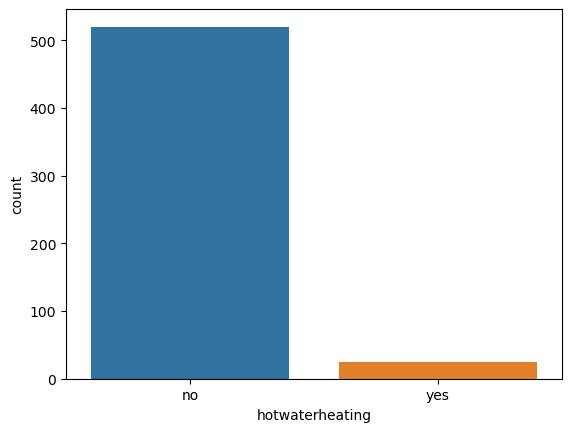

In [10]:
sns.countplot(df.hotwaterheating)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

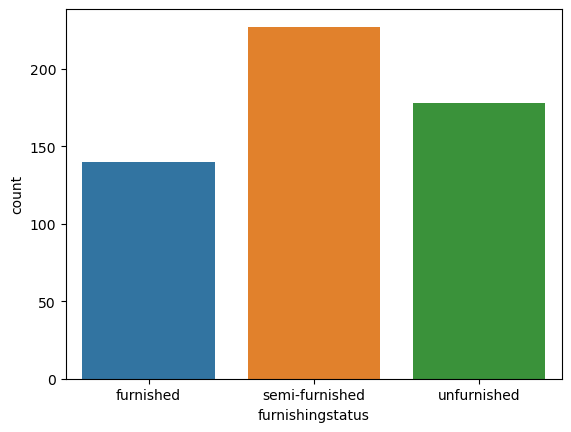

In [12]:
sns.countplot(df.furnishingstatus)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airconditioning', ylabel='price'>

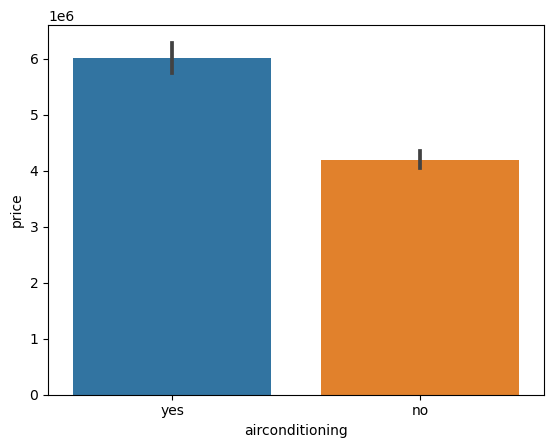

In [16]:
#scatterplot between price and air conditioning
sns.barplot(df.airconditioning,df.price)

<AxesSubplot:>

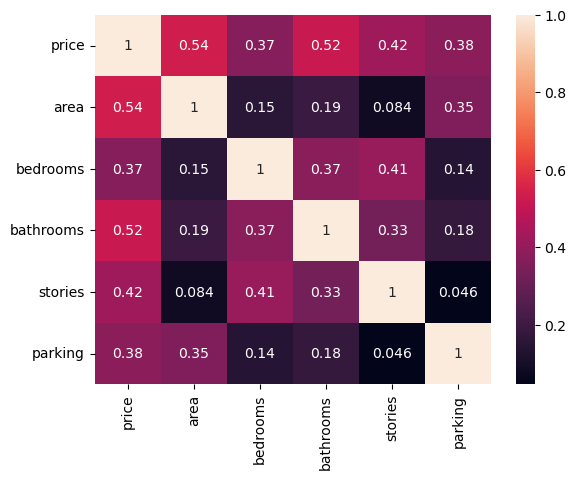

In [17]:
sns.heatmap(df.corr(), annot=True)

In [22]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

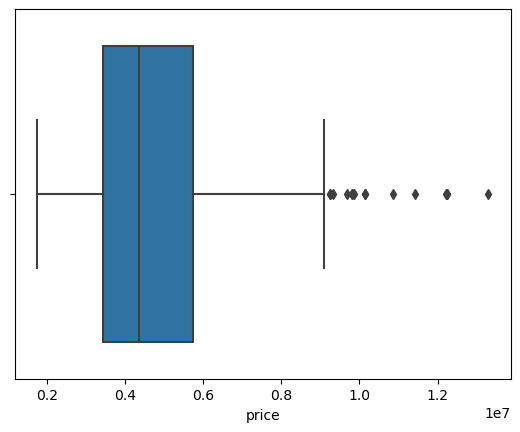

In [23]:
sns.boxplot(df['price'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

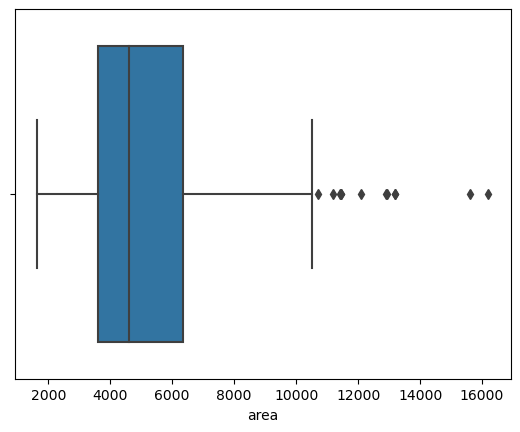

In [24]:
sns.boxplot(df['area'])

### Handling outlier

In [27]:
#Price
q1=np.percentile(df['price'],25)
q3=np.percentile(df['price'],75)
IQR=q3-q1
IQR

2310000.0

In [29]:
upper=q3+(1.5*IQR)
lower=q1-(1.5*IQR)

In [30]:
df = df[~((df['price'] <=lower) | (df['price'] >= upper))]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

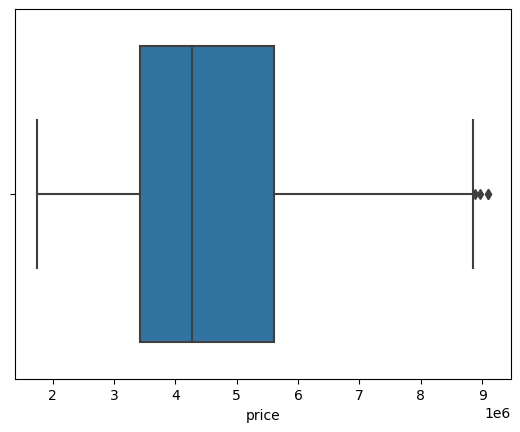

In [31]:
sns.boxplot(df.price)

In [33]:
#area
q1=np.percentile(df['area'],25)
q3=np.percentile(df['area'],75)
IQR=q3-q1
IQR

2768.25

In [34]:
upper=q3+(1.5*IQR)
lower=q1-(1.5*IQR)

In [35]:
df = df[~((df['area'] <=lower) | (df['area'] >= upper))]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

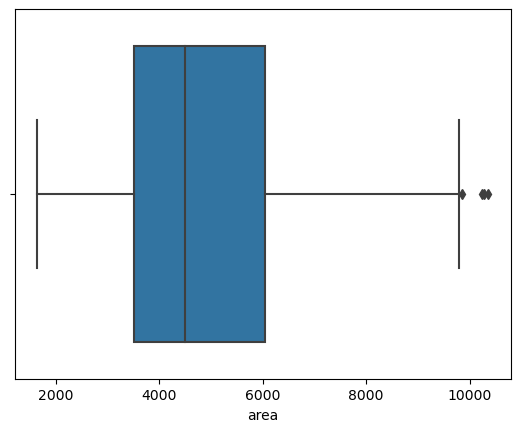

In [36]:
sns.boxplot(df.area)

## Encoding

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 15 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             517 non-null    int64 
 1   area              517 non-null    int64 
 2   bedrooms          517 non-null    int64 
 3   bathrooms         517 non-null    int64 
 4   stories           517 non-null    int64 
 5   mainroad          517 non-null    object
 6   guestroom         517 non-null    object
 7   basement          517 non-null    object
 8   hotwaterheating   517 non-null    object
 9   airconditioning   517 non-null    object
 10  parking           517 non-null    int64 
 11  furnishingstatus  517 non-null    object
dtypes: int64(6), object(6)
memory usage: 52.5+ KB


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [42]:
df['mainroad']=le.fit_transform(df['mainroad'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['basement']=le.fit_transform(df['basement'])
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
df['airconditioning']=le.fit_transform(df['airconditioning'])
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])

In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1


## Splitting the data into dependent and independent variables

In [44]:
y=df['price']
x=df.drop(columns='price',axis=1)

In [45]:
y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 517, dtype: int64

In [46]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
15,6000,4,1,2,1,0,1,0,0,2,1
16,6600,4,2,2,1,1,1,0,1,1,2
17,8500,3,2,4,1,0,0,0,1,2,0
18,4600,3,2,2,1,1,0,0,1,2,0
19,6420,3,2,2,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,2
541,2400,3,1,1,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0


## Scaling the independing data

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scale=MinMaxScaler()

In [49]:
scaled_x=pd.DataFrame(scale.fit_transform(x))

In [50]:
scaled_x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.499426,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.5
1,0.568312,0.6,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0
2,0.786452,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
3,0.338691,0.4,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.666667,0.0
4,0.547646,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,0.5


## Splitting the data into training and testing

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=0)

## Building, training, testing and evaluating the model

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=lr.predict(x_test)
y_pred

array([3878508.54668013, 3441377.36902096, 4454796.46919867,
       4441143.76643311, 5161780.26983408, 7388258.91713714,
       5048483.54992389, 2863861.66818004, 3108294.2543617 ,
       5155447.27287031, 3408358.50520607, 3782546.647716  ,
       3181986.84611122, 6578290.4674708 , 5468992.53347893,
       6251556.9542792 , 4356334.63680232, 2331753.59663814,
       4143134.58861312, 4395999.61122302, 7605770.01409688,
       4938050.44271083, 2404340.16123921, 3487083.98933253,
       3464110.79344507, 4426808.27534646, 5387742.56646148,
       3970891.65274885, 4899797.34901817, 6994610.16723934,
       6322710.00663534, 3136923.4965532 , 2944628.61813743,
       3543747.92745414, 2958460.25047695, 3803792.65416635,
       4572514.77667484, 4607256.60092454, 3443382.44332618,
       2304161.0998435 , 2312255.52727519, 5184831.85930994,
       3472909.18146898, 3946496.43955281, 5474172.89571775,
       4373602.57846335, 4042960.67948996, 6627501.69770881,
       5659558.28548399,

In [57]:
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test,y_pred, squared=False)

In [64]:
print("R-squared score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score: 0.6408744160315575
Mean Squared Error (MSE): 865826439074.863
Root Mean Squared Error (RMSE): 930497.9522142233
